In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import time
import numpy as np
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
Smileon_df = pd.read_csv('../data/Smileon.2021.10.17.csv',skiprows=2)
# Smileon_df.head()

C:\Users\Test\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,32,36,53,58,59,77,83,89,93,105,127,141,144) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option('display.max_columns', None) #this displays ALL the columns


# DELETE ALL THE COLUMNS WE ARE NOT GOING TO USE

In [4]:
cols = [2,8,9,10,11,12,13,14,15,21,22,23,24,26,27,28,29,30,31,32,33,35,37,38,39,40,41,42,43,44,45,46,49,55,57]
Smileon_df.drop(Smileon_df.columns[cols], axis=1, inplace=True)
Smileon_df.head (5)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,CountryName,PostalCode,PhoneType,Narrative,Feedback,EnteredByWorkerNum,EnteredOn,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,OrgNum,SMILE ON 60+ Demographic Information - # of People in Household,Birth Year,SMILE ON 60+ Demographic Information - Other Language,SMILE ON 60+ Notes (Optional) - Notes,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 220 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,SMILE ON 60+ Oral Care Encounter - 2335 - Quantity,SMILE ON 60+ Oral Care Encounter - 2390 - Quantity,SMILE ON 60+ Oral Care Encounter - 2391 - Quantity,SMILE ON 60+ Oral Care Encounter - 2392 - Quantity,SMILE ON 60+ Oral Care Encounter - 2393 - Quantity,SMILE ON 60+ Oral Care Encounter - 2394 - Quantity,SMILE ON 60+ Oral Care Encounter - 2915 - Quantity,SMILE ON 60+ Oral Care Encounter - 2920 - Quantity,SMILE ON 60+ Oral Care Encounter - 2933 - Quantity,SMILE ON 60+ Oral Care Encounter - 2940 - Quantity,SMILE ON 60+ Oral Care Encounter - 2950 - Quantity,SMILE ON 60+ Oral Care Encounter - 2954 - Quantity,SMILE ON 60+ Oral Care Encounter - 2955 - Quantity,SMILE ON 60+ Oral Care Encounter - 2980 - Quantity,SMILE ON 60+ Oral Care Encounter - 3220 - Quantity,SMILE ON 60+ Oral Care Encounter - 4341 - Quantity,SMILE ON 60+ Oral Care Encounter - 4342 - Quantity,SMILE ON 60+ Oral Care Encounter - 6930 - Quantity,SMILE ON 60+ Oral Care Encounter - 6980 - Quantity,SMILE ON 60+ Oral Care Encounter - 7111 - Quantity,SMILE ON 60+ Oral Care Encounter - 7140 - Quantity,SMILE ON 60+ Oral Care Encounter - 7210 - Quantity,SMILE ON 60+ Oral Care Encounter - 7220 - Quantity,SMILE ON 60+ Oral Care Encounter - 7230 - Quantity,SMILE ON 60+ Oral Care Encounter - 7240 - Quantity,SMILE ON 60+ Oral Care Encounter - 7241 - Quantity,SMILE ON 60+ Oral Care Encounter - 7250 - Quantity,SMILE ON 60+ Oral Care Encounter - 7261 - Quantity,SMILE ON 60+ Oral Care Encounter - 7285 - Quantity,SMILE ON 60+ Oral Care Encounter - 7286 - Quantity,SMILE ON 60+ Oral Care Encounter - 7310 - Quantity,SMILE ON 60+ Oral Care Encounter - 7311 - Quantity,SMILE ON 60+ Oral Care Encounter - 7320 - Quantity,SMILE ON 60+ Oral Care Encounter - 7321 - Quantity,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7412 - Quantity,SMILE ON 60+ Oral Care Encounter - 7413 - Quantity,SMILE ON 60+ Oral Care Encounter - 7414 - Quantity,SMILE ON 60+ Oral Care Encounter - 7415 - Quantity,SMILE ON 60+ Oral Care Encounter - 7440 - Quantity,SMILE ON 60+ Oral Care Encounter - 7450 - Quantity,SMILE ON 60+ Oral Care Encounter - 7451 - Quantity,SMILE ON 60+ Oral Care Encounter - 7460 - Quantity,SMILE ON 60+ Oral Care Encounter - 7461 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7511 - Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Maxillary Quantity,SMILE ON 60+ Oral Care Encounter - 7971 - Quantity,SMILE ON 60+ Oral Care Encounter - 7972 - Quantity,SMILE ON 60+ Oral Care Encounter - 9110 - Quantity,SMILE ON 60+ Oral Care Encounter - 9951 - Quantity,SMILE ON 60+ Oral Care Encounter - Lab Assist narrative,SMILE ON 60+ Oral Care Encounter - No Code - Denture Step Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - No Code - 

## member 2807762 has no data== removed

In [5]:
Smileon_df = Smileon_df.drop(Smileon_df.index[[44358]])


In [6]:
Smileon_df.loc[Smileon_df.index[44358]]

CallReportNum                                                                                                                                                                           64760020
ReportVersion                                                                                                                                                              SMILE ON 60+ Clinical
CallDateAndTimeStart                                                                                                                                                             7/17/2019 14:28
CallDateAndTimeEnd                                                                                                                                                               7/17/2019 14:31
CallLength                                                                                                                                                                                     3
                                   

# changing the Smileon_df columns to a list 

In [7]:
Smileon_ls = Smileon_df.columns.tolist()
# Smileon_ls

# create a for- loop to remove the words 'SMILE ON 60+ ' from all columns

In [8]:
new_columns = []
for column in Smileon_ls:
    new_column = column.replace('SMILE ON 60+ ', '')
    new_columns.append(new_column)    
    
# new_columns

In [9]:
Smileon_df.columns = new_columns
# Smileon_df.columns

# Created a Lambda loop to change the columns name from Oral Care Encounter' to 'code' 

In [10]:
Smileon_df.columns = Smileon_df.columns.map(lambda a: str(a).replace('Oral Care Encounter','code'))

In [11]:
Smileon_df.columns.tolist()

['CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'PhoneType',
 'Narrative',
 'Feedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'Demographic Information - # of People in Household',
 'Birth Year',
 'Demographic Information - Other Language',
 'Notes (Optional) - Notes',
 'code - 1351 - Quantity',
 'code - 1354 - Quantity',
 'code - 2140 - Quantity',
 'code - 2150 - Quantity',
 'code - 2160 - Quantity',
 'code - 2161 - Quantity',
 'code - 220 - Quantity',
 'code - 230 - Quantity',
 'code - 2330 - Quantity',
 'code - 2331 - Quantity',
 'code - 2332 - Quantity',
 'code - 2335 - Quantity',
 'code - 2390 - Quantity',
 'code - 2391 - Quantity',
 'code - 2392 - Quantity',
 'code - 2393 - Quantity',
 'code - 2394 -

In [12]:
Smileon_df.columns = Smileon_df.columns.map(lambda a: str(a).replace('Base-line Oral and Conditions Questions','questions'))

In [13]:
Smileon_df.columns.tolist()

['CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'PhoneType',
 'Narrative',
 'Feedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'Demographic Information - # of People in Household',
 'Birth Year',
 'Demographic Information - Other Language',
 'Notes (Optional) - Notes',
 'code - 1351 - Quantity',
 'code - 1354 - Quantity',
 'code - 2140 - Quantity',
 'code - 2150 - Quantity',
 'code - 2160 - Quantity',
 'code - 2161 - Quantity',
 'code - 220 - Quantity',
 'code - 230 - Quantity',
 'code - 2330 - Quantity',
 'code - 2331 - Quantity',
 'code - 2332 - Quantity',
 'code - 2335 - Quantity',
 'code - 2390 - Quantity',
 'code - 2391 - Quantity',
 'code - 2392 - Quantity',
 'code - 2393 - Quantity',
 'code - 2394 -

In [14]:
Smileon_df.columns = Smileon_df.columns.map(lambda a: str(a).replace('Demographic Information', 'demographics'))

In [15]:
Smileon_df['CallDateAndTimeStart'] = pd.to_datetime(Smileon_df['CallDateAndTimeStart'])

In [16]:
Smileon_df['CallDateAndTimeEnd'] = pd.to_datetime(Smileon_df['CallDateAndTimeEnd'])

In [17]:
Smileon_df['EnteredOn'] = pd.to_datetime(Smileon_df['EnteredOn'])

In [18]:
Smileon_df[['EnteredOn', 'CallDateAndTimeStart', 'CallDateAndTimeEnd']].head(2)

,EnteredOn,CallDateAndTimeStart,CallDateAndTimeEnd
0,2021-09-30 16:57:00,2021-09-30 16:56:00,2021-09-30 16:57:00
1,2021-09-30 16:53:00,2021-09-30 16:53:00,2021-09-30 16:53:00


In [19]:
Smileon_df.loc[~Smileon_df['Screening - Last Screening Date'].str.contains('/', na = False), 'Screening - Last Screening Date'].value_counts().head (2)

8.24.2020    6
9.15.2020    5
Name: Screening - Last Screening Date, dtype: int64

In [20]:
Smileon_df['Screening - Last Screening Date'].replace('6022020', '2020-06-02', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('10232020', '2020-10-23', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('8212019', '2019-08-21', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('10312018', '2018-10-31', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('10082019', '2019-10-08', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('11262019', '2019-11-26', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('3152019', '2019-03-15', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('81519', '2019-08-15', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('11002019', '2019-11-01', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('1222020', '2020-12-02', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('8162019', '2019-08-16', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('9252019', '2019-09-25', inplace=True)
Smileon_df['Screening - Last Screening Date'].replace('9052019', '2019-09-05', inplace=True)

In [21]:
list= (['CallReportNum','CallerNum', 'ReportVersion', 'CallDateAndTimeStart','CallDateAndTimeEnd', 'CallLength', 'PhoneWorkerNum','CityName', 'CountyName', 'StateProvince',
        'CountryName', 'PostalCode', 'PhoneType', 'Narrative', 'Feedback', 'EnteredByWorkerNum', 'EnteredOn', 'Reviewed', 
        'FeedbackStatus','FeedbackFromPhoneWorkerNum', 'FeedbackFromPhoneWorkerName', 'ReferralsMade'])

intake = Smileon_df[list]
# intake.head(5)

In [22]:
intake.CountyName.to_list()

['Rutherford',
 'Davidson',
 'Shelby',
 'Shelby',
 'Shelby',
 'Rutherford',
 'Rutherford',
 'Williamson',
 'Shelby',
 'Shelby',
 'Robertson',
 'Wilson',
 'Rutherford',
 'Rutherford',
 'Rutherford',
 'Shelby',
 'Shelby',
 'Sullivan',
 'Sullivan',
 'Bradley',
 'Davidson',
 'Davidson',
 'Greene',
 'Davidson',
 'Davidson',
 'Davidson',
 'Williamson',
 'Greene',
 'Wilson',
 'Davidson',
 'Davidson',
 'Robertson',
 'Shelby',
 'Davidson',
 'Davidson',
 'Davidson',
 'Sumner',
 'Davidson',
 'Davidson',
 'Williamson',
 'Sumner',
 'Davidson',
 'Shelby',
 'Shelby',
 'Davidson',
 'Shelby',
 'Greene',
 'Montgomery',
 'Wilson',
 'Washington',
 'Davidson',
 'Lawrence',
 'Washington',
 'Greene',
 'Washington',
 'Davidson',
 'Davidson',
 'Coffee',
 'Sumner',
 'Shelby',
 'Davidson',
 'Rutherford',
 'Davidson',
 'Davidson',
 'Davidson',
 'Hawkins',
 'Shelby',
 'Hawkins',
 'Shelby',
 'Hawkins',
 'Greene',
 'Shelby',
 'Shelby',
 'Shelby',
 'Shelby',
 'Shelby',
 'Davidson',
 'Shelby',
 'Shelby',
 'Smith',
 'D

In [23]:
codes_list = (['CallReportNum', 'CallerNum','CallDateAndTimeStart','code - 1351 - Quantity', 'code - 1354 - Quantity', 'code - 2140 - Quantity',
 'code - 2150 - Quantity', 'code - 2160 - Quantity', 'code - 2161 - Quantity', 'code - 220 - Quantity', 'code - 230 - Quantity',
 'code - 2330 - Quantity', 'code - 2331 - Quantity', 'code - 2332 - Quantity', 'code - 2335 - Quantity', 'code - 2390 - Quantity',
 'code - 2391 - Quantity', 'code - 2392 - Quantity', 'code - 2393 - Quantity', 'code - 2394 - Quantity', 'code - 2915 - Quantity',
 'code - 2920 - Quantity', 'code - 2933 - Quantity', 'code - 2940 - Quantity', 'code - 2950 - Quantity', 'code - 2954 - Quantity',
 'code - 2955 - Quantity', 'code - 2980 - Quantity', 'code - 3220 - Quantity', 'code - 4341 - Quantity', 'code - 4342 - Quantity',
 'code - 6930 - Quantity', 'code - 6980 - Quantity', 'code - 7111 - Quantity', 'code - 7140 - Quantity', 'code - 7210 - Quantity',
 'code - 7220 - Quantity', 'code - 7230 - Quantity', 'code - 7240 - Quantity', 'code - 7241 - Quantity', 'code - 7250 - Quantity',
 'code - 7261 - Quantity', 'code - 7285 - Quantity', 'code - 7286 - Quantity', 'code - 7310 - Quantity', 'code - 7311 - Quantity',
 'code - 7320 - Quantity', 'code - 7321 - Quantity', 'code - 7410 - Quantity', 'code - 7411 - Quantity', 'code - 7412 - Quantity',
 'code - 7413  - Quantity', 'code - 7414 - Quantity', 'code - 7415 - Quantity', 'code - 7440 - Quantity', 'code - 7450 - Quantity',
 'code - 7451 - Quantity', 'code - 7460 - Quantity', 'code - 7461 - Quantity', 'code - 7471 - Quantity', 'code - 7510 - Quantity',
 'code - 7511 - Quantity', 'code - 7970 - Mandibular Quantity', 'code - 7970 - Maxillary Quantity ', 'code - 7971 - Quantity',
 'code - 7972 - Quantity', 'code - 9110 - Quantity', 'code - 9951 - Quantity', 'code - Lab Assist narrative',
 'code - No Code - Denture Step Mandibular Quantity', 'code - No Code - Denture Step Maxillary Quantity',])

codes= Smileon_df[codes_list]
# codes.head(2)

In [24]:
questions_list= (['CallReportNum', 'CallerNum','CallDateAndTimeStart','questions - Are you limited in what you can eat?', 'questions - Dental Clinic', 'questions - Did the client commit to referral?',
 'questions - Did you help in these other areas?', 'questions - Do you need help in these other areas?',
 'questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?',
 'questions - How would you describe the condition of your mouth and teeth?', 'questions - What is the next step for client encounter?',
 'questions - What is the next step for clients encounter?', 'Case Management Information - Dental Clinic',
 'Case Management Information - Transportation Barriers', 'Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply)',
 'Case Management Information - What is the outcome for the client?'])
questions = Smileon_df.filter(items= questions_list)
# questions.head()

In [25]:
demographic_ls=  (['CallReportNum', 'CallerNum','CallDateAndTimeStart','Birth Year','demographics - # of People in Household', 
 'demographics - Other Language', 'Notes (Optional) - Notes','demographics - Gender', 'demographics - Household Income Level',
 'demographics - How did you first hear about the program?', 'demographics - Preferred Language/Language Needed',
 'demographics - Race/Ethnicity', 'demographics - What other assistance programs are you on?',
 'demographics - When is the last time you visited your dentist?'])

demographic= Smileon_df.filter(items= demographic_ls)
# demographic.head()

In [26]:
type(demographic['Birth Year'][1])

int

In [27]:
eligib_list= (['CallReportNum', 'CallerNum','CallDateAndTimeStart','Verification of Eligibility - Verification Date',
              'Presumptive Eligibility - Dental Insurance?', 'Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?',
 'Presumptive Eligibility - What is the next step for clients encounter? ', 'Presumptive Eligibility - What is the next step for clients encounter?','Verification of Eligibility - Transportation Arranged',
 'Verification of Eligibility - Verification of Eligibility'])

eligibility= Smileon_df.filter(items= eligib_list)
# eligibility.head()

In [28]:
outcomes_list =(['CallReportNum', 'CallerNum','CallDateAndTimeStart','Treatment Plan - Action: Upload After Picture on Finish Tab',
 'Treatment Plan - Is the treatment plan completed?','Treatment Plan - Was a treatment plan developed?',
 'Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)',
                 'code - Action: Upload After Picture on Finish Tab', 'code - Is the treatment plan completed?',
 'code - Was a treatment plan developed?', 'code - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)',
 'code - What care was provided to the enrollee? (Select all that apply)'])

outcomes= Smileon_df.filter(items= outcomes_list)
# outcomes.head()

In [29]:
screening_info_list =(['CallReportNum', 'CallerNum','CallDateAndTimeStart','Screening - # of Lower Natural Teeth',
 'Screening - # of Upper Natural Teeth', 'Screening - Do you have removable dentures?', 'Screening - Do you usually wear your denture(s) when you eat?',
 'Screening - Experienced any problems related to mouth/teeth during past 12 months?', 'Screening - How often do you brush your teeth?',
 'Screening - Need for Periodontal Care', 'Screening - Root Fragments', 'Screening - Suspicious Soft Tissue Lesions',
 'Screening - Treatment Urgency', 'Screening - Untreated Decay', 'Site Information - Enroller ID',
 'Site Information - Enroller Location','Clinic Information - Action: Upload Before Picture on Finish Tab',
 'Clinic Information - Is patient of record date if yes last seen?', 'Clinic Information - Was initial appointment made?',
 'Clinic Information - Was initial transportation assistance or referral provided?','Screening - Last Screening Date'])

screening_info= Smileon_df.filter(items= screening_info_list)
# screening_info.head()

In [30]:
demographic

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,55627514,2385621,2018-08-01 08:00:00,1957,2,NaN,NaN,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months
57856,67251452,2631417,2018-05-31 08:27:00,1958,1,NaN,removed 5213 and 5214 with lab assists and 714...,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
57857,53192452,-1,2018-05-23 14:11:00,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,67915561,3239813,2018-05-15 09:06:00,1958,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years


In [31]:
demographic.loc[demographic['Birth Year']=='#NUM!'] # some of the Birth Year had '#NUM!'.  

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
17417,81177698,3846951,2020-11-20 09:19:00,#NUM!,1,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years
52334,59916549,2591513,2019-01-31 09:33:00,#NUM!,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months


In [32]:
demographic.loc[demographic['CallerNum']==3846951]
# check to see if they are already in the datwbase with the correct Birth Year

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
2788,91142758,3846951,2021-08-10 11:45:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years
5294,89633836,3846951,2021-06-29 11:33:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years
12122,85520508,3846951,2021-03-10 16:01:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years
17417,81177698,3846951,2020-11-20 09:19:00,#NUM!,1,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years


In [33]:
demographic.loc[demographic['CallerNum']==2591513]
# check to see if they are already in the datwbase with the correctBirth Year

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
8015,88119096,2591513,2021-05-18 08:17:00,1949,2.0,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months
12578,85490840,2591513,2021-03-03 07:34:00,1949,2.0,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months
52224,60201827,2591513,2019-02-04 14:18:00,1949,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
52334,59916549,2591513,2019-01-31 09:33:00,#NUM!,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months


In [34]:
demographic['Birth Year'][11371] = 1956
demographic['Birth Year'][30679] = 1959
demographic['Birth Year'][25632] = 1941
demographic['Birth Year'][9660] = 1961
demographic['Birth Year'][22663] = 1953
demographic['Birth Year'][19254] = 1956
demographic['Birth Year'][18845] = 1944
demographic['Birth Year'][18615] = 1955
demographic['Birth Year'][13202] = 1958
demographic['Birth Year'][9780] = 1961
demographic['Birth Year'][57354]= 1944
demographic['Birth Year'][53251]= 1958
demographic['Birth Year'][38698] = 1938
demographic['Birth Year'][52334]= 1949
demographic['Birth Year'][17417]=1960
demographic['Birth Year'][47713]= 1956
demographic['Birth Year'][11371] = 1956
demographic['Birth Year'][30679] = 1959
demographic['Birth Year'][25632] = 1941
demographic['Birth Year'][9660] = 1961
demographic['Birth Year'][22663] = 1953
demographic['Birth Year'][19254] = 1956
demographic['Birth Year'][18845] = 1944
demographic['Birth Year'][18615] = 1955
demographic['Birth Year'][13202] = 1958
demographic['Birth Year'][9780] = 1961
demographic['Birth Year'][57354]= 1944
demographic['Birth Year'][53251]= 1958 
demographic['Birth Year'][46730]= 1955

<ipython-input-34-756fc87df783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][11371] = 1956
<ipython-input-34-756fc87df783>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][30679] = 1959
<ipython-input-34-756fc87df783>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][25632] = 1941
<ipython-input-34-756fc87df783>:4: SettingWithCopyWarning: 
A value is tryin

In [35]:
demographic.loc[demographic['CallerNum']==2591513]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
8015,88119096,2591513,2021-05-18 08:17:00,1949,2.0,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months
12578,85490840,2591513,2021-03-03 07:34:00,1949,2.0,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months
52224,60201827,2591513,2019-02-04 14:18:00,1949,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
52334,59916549,2591513,2019-01-31 09:33:00,1949,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months


In [36]:
for year in demographic['Birth Year']:
    print(type(year))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

In [37]:
demographic['Birth Year']= demographic['Birth Year'].astype (int) #Changed the Birth Year to "int"

# Created the "age" column 

In [38]:
age= []
now= pd.Timestamp.now().year

for year in demographic['Birth Year']:
    diff = now-year
    age.append(diff)
    
age

[61,
 62,
 79,
 61,
 66,
 63,
 73,
 79,
 60,
 62,
 76,
 66,
 73,
 63,
 65,
 68,
 68,
 73,
 73,
 62,
 63,
 68,
 86,
 61,
 61,
 66,
 78,
 62,
 66,
 76,
 60,
 76,
 65,
 68,
 69,
 61,
 71,
 79,
 67,
 61,
 71,
 70,
 65,
 64,
 63,
 80,
 76,
 76,
 66,
 65,
 61,
 66,
 65,
 61,
 74,
 77,
 63,
 61,
 70,
 61,
 70,
 65,
 65,
 63,
 61,
 73,
 65,
 84,
 69,
 84,
 63,
 0,
 65,
 61,
 0,
 61,
 65,
 64,
 64,
 63,
 83,
 66,
 72,
 66,
 61,
 61,
 74,
 79,
 61,
 80,
 63,
 84,
 64,
 74,
 66,
 64,
 84,
 84,
 76,
 72,
 63,
 77,
 61,
 81,
 62,
 73,
 67,
 63,
 69,
 63,
 73,
 61,
 62,
 72,
 63,
 62,
 71,
 64,
 65,
 62,
 65,
 72,
 61,
 83,
 64,
 64,
 60,
 62,
 60,
 63,
 69,
 74,
 68,
 65,
 63,
 84,
 84,
 67,
 73,
 70,
 75,
 63,
 64,
 60,
 70,
 65,
 64,
 66,
 64,
 61,
 73,
 73,
 62,
 75,
 63,
 63,
 68,
 65,
 66,
 66,
 66,
 75,
 75,
 68,
 71,
 66,
 70,
 76,
 61,
 62,
 70,
 75,
 62,
 62,
 70,
 70,
 71,
 78,
 78,
 63,
 63,
 64,
 61,
 73,
 67,
 63,
 80,
 62,
 65,
 75,
 65,
 67,
 62,
 62,
 65,
 60,
 63,
 60,
 65,
 79,
 6

In [39]:
demographic.insert(4,'Age',age) # chose where the Age will be placed on the table 

In [40]:
demographic

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,61,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,62,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,79,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,61,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,66,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,55627514,2385621,2018-08-01 08:00:00,1957,64,2,NaN,NaN,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months
57856,67251452,2631417,2018-05-31 08:27:00,1958,63,1,NaN,removed 5213 and 5214 with lab assists and 714...,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
57857,53192452,-1,2018-05-23 14:11:00,1900,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,67915561,3239813,2018-05-15 09:06:00,1958,63,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years


In [41]:
demographic= demographic.loc[demographic['CallerNum']!=-2] 
# removed all the "CallerNum" with -2 (not a valid CallerNum number)

In [42]:
demographic.head ()

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,61,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,62,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,79,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,61,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,66,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years


In [43]:
demographic['CallReportNum'].count()

57853

In [44]:
demographic['CallReportNum'].value_counts()

85985281    1
88219433    1
79570798    1
62193609    1
71884657    1
           ..
65705159    1
84602056    1
78705867    1
72142028    1
74807989    1
Name: CallReportNum, Length: 57853, dtype: int64

In [45]:
Smileon_df.columns = Smileon_df.columns.map(lambda a: str(a).replace('Oral Care Encounter','code'))

In [46]:
demographic= demographic.loc[demographic['CallerNum']!=-1]

In [47]:
demographic

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,61,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,62,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,79,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,61,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,66,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57854,55104302,2384744,2018-08-01 08:18:00,1954,67,1,NaN,NaN,Female,$21246-$24280,This encounter,NaN,Caucasian,NaN,Less than 12 months
57855,55627514,2385621,2018-08-01 08:00:00,1957,64,2,NaN,NaN,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months
57856,67251452,2631417,2018-05-31 08:27:00,1958,63,1,NaN,removed 5213 and 5214 with lab assists and 714...,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
57858,67915561,3239813,2018-05-15 09:06:00,1958,63,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years


In [48]:
demographic['CallerNum'].value_counts()

3212379    54
2441776    43
2758373    42
2431132    37
2416076    35
           ..
2768284     1
3232210     1
2391974     1
3084762     1
2796099     1
Name: CallerNum, Length: 10708, dtype: int64

In [49]:
Smileon_df.loc[Smileon_df['CallerNum']==3212379]

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,CountryName,PostalCode,PhoneType,Narrative,Feedback,EnteredByWorkerNum,EnteredOn,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,OrgNum,demographics - # of People in Household,Birth Year,demographics - Other Language,Notes (Optional) - Notes,code - 1351 - Quantity,code - 1354 - Quantity,code - 2140 - Quantity,code - 2150 - Quantity,code - 2160 - Quantity,code - 2161 - Quantity,code - 220 - Quantity,code - 230 - Quantity,code - 2330 - Quantity,code - 2331 - Quantity,code - 2332 - Quantity,code - 2335 - Quantity,code - 2390 - Quantity,code - 2391 - Quantity,code - 2392 - Quantity,code - 2393 - Quantity,code - 2394 - Quantity,code - 2915 - Quantity,code - 2920 - Quantity,code - 2933 - Quantity,code - 2940 - Quantity,code - 2950 - Quantity,code - 2954 - Quantity,code - 2955 - Quantity,code - 2980 - Quantity,code - 3220 - Quantity,code - 4341 - Quantity,code - 4342 - Quantity,code - 6930 - Quantity,code - 6980 - Quantity,code - 7111 - Quantity,code - 7140 - Quantity,code - 7210 - Quantity,code - 7220 - Quantity,code - 7230 - Quantity,code - 7240 - Quantity,code - 7241 - Quantity,code - 7250 - Quantity,code - 7261 - Quantity,code - 7285 - Quantity,code - 7286 - Quantity,code - 7310 - Quantity,code - 7311 - Quantity,code - 7320 - Quantity,code - 7321 - Quantity,code - 7410 - Quantity,code - 7411 - Quantity,code - 7412 - Quantity,code - 7413 - Quantity,code - 7414 - Quantity,code - 7415 - Quantity,code - 7440 - Quantity,code - 7450 - Quantity,code - 7451 - Quantity,code - 7460 - Quantity,code - 7461 - Quantity,code - 7471 - Quantity,code - 7510 - Quantity,code - 7511 - Quantity,code - 7970 - Mandibular Quantity,code - 7970 - Maxillary Quantity,code - 7971 - Quantity,code - 7972 - Quantity,code - 9110 - Quantity,code - 9951 - Quantity,code - Lab Assist narrative,code - No Code - Denture Step Mandibular Quantity,code - No Code - Denture Step Maxillary Quantity,Screening - Last Screening Date,Verification of Eligibility - Verification Date,questions - Are you limited in what you can eat?,questions - Dental Clinic,questions - Did the client commit to referral?,questions - Did you help in these other areas?,questions - Do you need help in these other areas?,questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,questions - How would you describe the condition of your mouth and teeth?,questions - What is the next step for client encounter?,questions - What is the next step for clients encounter?,Case Management Information - Dental Clinic,Case Management Information - Transportation Barriers,Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply),Case Management Information - What is the outcome for the client?,Clinic Information - Action: Upload Before Picture on Finish Tab,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,Clinic Information - Was initial transportation assistance or referral provided?,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?,code - Action: Upload After Picture on Finish Tab,code - Is the treatment plan completed?,code - Was a treatment plan developed?,"code - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",code - What care was provided to the enrollee? (Select all that apply),Presumptive Eligibility - Dental Insurance?,Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?,Presumptive Eligib

In [50]:
Smileon_df.loc[Smileon_df['CallerNum']==3212379]

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,CountryName,PostalCode,PhoneType,Narrative,Feedback,EnteredByWorkerNum,EnteredOn,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,OrgNum,demographics - # of People in Household,Birth Year,demographics - Other Language,Notes (Optional) - Notes,code - 1351 - Quantity,code - 1354 - Quantity,code - 2140 - Quantity,code - 2150 - Quantity,code - 2160 - Quantity,code - 2161 - Quantity,code - 220 - Quantity,code - 230 - Quantity,code - 2330 - Quantity,code - 2331 - Quantity,code - 2332 - Quantity,code - 2335 - Quantity,code - 2390 - Quantity,code - 2391 - Quantity,code - 2392 - Quantity,code - 2393 - Quantity,code - 2394 - Quantity,code - 2915 - Quantity,code - 2920 - Quantity,code - 2933 - Quantity,code - 2940 - Quantity,code - 2950 - Quantity,code - 2954 - Quantity,code - 2955 - Quantity,code - 2980 - Quantity,code - 3220 - Quantity,code - 4341 - Quantity,code - 4342 - Quantity,code - 6930 - Quantity,code - 6980 - Quantity,code - 7111 - Quantity,code - 7140 - Quantity,code - 7210 - Quantity,code - 7220 - Quantity,code - 7230 - Quantity,code - 7240 - Quantity,code - 7241 - Quantity,code - 7250 - Quantity,code - 7261 - Quantity,code - 7285 - Quantity,code - 7286 - Quantity,code - 7310 - Quantity,code - 7311 - Quantity,code - 7320 - Quantity,code - 7321 - Quantity,code - 7410 - Quantity,code - 7411 - Quantity,code - 7412 - Quantity,code - 7413 - Quantity,code - 7414 - Quantity,code - 7415 - Quantity,code - 7440 - Quantity,code - 7450 - Quantity,code - 7451 - Quantity,code - 7460 - Quantity,code - 7461 - Quantity,code - 7471 - Quantity,code - 7510 - Quantity,code - 7511 - Quantity,code - 7970 - Mandibular Quantity,code - 7970 - Maxillary Quantity,code - 7971 - Quantity,code - 7972 - Quantity,code - 9110 - Quantity,code - 9951 - Quantity,code - Lab Assist narrative,code - No Code - Denture Step Mandibular Quantity,code - No Code - Denture Step Maxillary Quantity,Screening - Last Screening Date,Verification of Eligibility - Verification Date,questions - Are you limited in what you can eat?,questions - Dental Clinic,questions - Did the client commit to referral?,questions - Did you help in these other areas?,questions - Do you need help in these other areas?,questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,questions - How would you describe the condition of your mouth and teeth?,questions - What is the next step for client encounter?,questions - What is the next step for clients encounter?,Case Management Information - Dental Clinic,Case Management Information - Transportation Barriers,Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply),Case Management Information - What is the outcome for the client?,Clinic Information - Action: Upload Before Picture on Finish Tab,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,Clinic Information - Was initial transportation assistance or referral provided?,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?,code - Action: Upload After Picture on Finish Tab,code - Is the treatment plan completed?,code - Was a treatment plan developed?,"code - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",code - What care was provided to the enrollee? (Select all that apply),Presumptive Eligibility - Dental Insurance?,Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?,Presumptive Eligib

In [51]:
demographic['demographics - Gender'].value_counts()

Female         35850
Male           21459
Transgender       21
Other              1
Name: demographics - Gender, dtype: int64

In [52]:
demographic['demographics - How did you first hear about the program?'].value_counts()

Dental Clinic Staff                      33295
Other                                     9780
This encounter                            3015
Wisdom Tooth Project Presentation         2160
Senior Center                             2050
SMILE ON CDHC                             1678
TV                                        1470
Flyer                                      786
Newspaper                                  297
Dental Hotline                             259
SHIP Navigator                             129
Health Assist                               68
Radio                                       60
Tennessee Alliance for Legal Services        4
Habitat for Humanity Greater Memphis         2
Name: demographics - How did you first hear about the program?, dtype: int64

In [53]:
demographic['demographics - Race/Ethnicity'].value_counts()

Caucasian                            32243
African American                     14668
Hispanic                              2656
Asian                                  836
Unknown                                833
American Indian and Alaska Native      170
Multi-racial                           147
Pacific Islander                        37
Name: demographics - Race/Ethnicity, dtype: int64

In [54]:
demographic['demographics - What other assistance programs are you on?'].value_counts()

SSI/SSDI                               12195
SNAP                                    3967
TennCare                                2061
SNAP; TennCare                          1805
SNAP; SSI/SSDI                          1792
SNAP; TennCare; SSI/SSDI                1657
TennCare; SSI/SSDI                      1443
Section 8                                920
SNAP; Section 8                          615
SNAP; TennCare; Section 8; SSI/SSDI      523
SNAP; TennCare; Section 8                483
Section 8; SSI/SSDI                      443
SNAP; Section 8; SSI/SSDI                255
TennCare; Section 8; SSI/SSDI            227
TennCare; Section 8                      217
Name: demographics - What other assistance programs are you on?, dtype: int64

In [55]:
#Smileon_df.loc[Smileon_df['CallerNum']==3212379,['CallerNum','CallDateAndTimeStart','Presumptive Eligibility - Dental Insurance?']].head ()

In [56]:
demographic.loc[demographic['Age'] < 50].head ()

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
71,93314524,4569681,2021-09-30 08:30:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,Less than 12 months
74,93314197,4569681,2021-09-30 08:21:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,African American,NaN,Less than 12 months
14340,83736245,4005782,2021-01-27 11:31:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,SMILE ON CDHC,English,African American,SNAP; SSI/SSDI,More than 5 years
37566,67900181,2999837,2019-10-24 16:57:00,1978,43,NaN,NaN,NaN,Male,NaN,Wisdom Tooth Project Presentation,NaN,African American,NaN,NaN
43213,65224352,2832267,2019-08-06 16:20:00,1975,46,2,NaN,NaN,Female,$36366-$41560,SMILE ON CDHC,English,Caucasian,NaN,Less than 12 months


In [57]:
for ind, row in demographic.iterrows():
    if row['Age'] <= 60:
        demographic.loc[ind, 'Age_Category'] = 'Under 60'
    elif row['Age'] <=64:
        demographic.loc[ind, 'Age_Category'] = '60-64'
    elif row['Age'] <=69:
        demographic.loc[ind, 'Age_Category'] = '65-69'
    elif row['Age'] <=74:
        demographic.loc[ind, 'Age_Category'] = '70-74'
    elif row['Age'] <=79:
        demographic.loc[ind, 'Age_Category'] = '75-79'
    elif row['Age'] <=84:
        demographic.loc[ind, 'Age_Category'] = '80-84'        
    else:
        demographic.loc[ind, 'Age_Category'] = '85+'
print('finished!')

finished!


In [58]:
demographic

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?,Age_Category
0,93115324,3638169,2021-09-30 16:56:00,1960,61,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN,60-64
1,93115188,4431194,2021-09-30 16:53:00,1959,62,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years,60-64
2,93115081,2941341,2021-09-30 16:50:00,1942,79,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months,75-79
3,93115032,3823933,2021-09-30 16:48:00,1960,61,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years,60-64
4,93114968,3348256,2021-09-30 16:46:00,1955,66,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years,65-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57854,55104302,2384744,2018-08-01 08:18:00,1954,67,1,NaN,NaN,Female,$21246-$24280,This encounter,NaN,Caucasian,NaN,Less than 12 months,65-69
57855,55627514,2385621,2018-08-01 08:00:00,1957,64,2,NaN,NaN,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months,60-64
57856,67251452,2631417,2018-05-31 08:27:00,1958,63,1,NaN,removed 5213 and 5214 with lab assists and 714...,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months,60-64
57858,67915561,3239813,2018-05-15 09:06:00,1958,63,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years,60-64


In [59]:
ploting = demographic.drop_duplicates('CallerNum')

In [60]:
ploting = ploting[['CallerNum', 'Age_Category']]
ploting

,CallerNum,Age_Category
0,3638169,60-64
1,4431194,60-64
2,2941341,75-79
3,3823933,60-64
4,3348256,65-69
...,...,...
57827,2385100,60-64
57828,2385088,75-79
57831,2385054,80-84
57834,2385074,80-84


In [61]:
ploting['Age_Category'].value_counts()

65-69       3099
60-64       2941
70-74       1842
75-79       1178
85+          748
80-84        693
Under 60     207
Name: Age_Category, dtype: int64

In [62]:
age_count=pd.DataFrame(ploting['Age_Category'].value_counts()).reset_index().rename(columns={'index':'Age_Range', 'Age_Category':'Age_Count'}).sort_values('Age_Range')
age_count

,Age_Range,Age_Count
1,60-64,2941
0,65-69,3099
2,70-74,1842
3,75-79,1178
5,80-84,693
4,85+,748
6,Under 60,207


In [63]:
# demographic['Age Category']

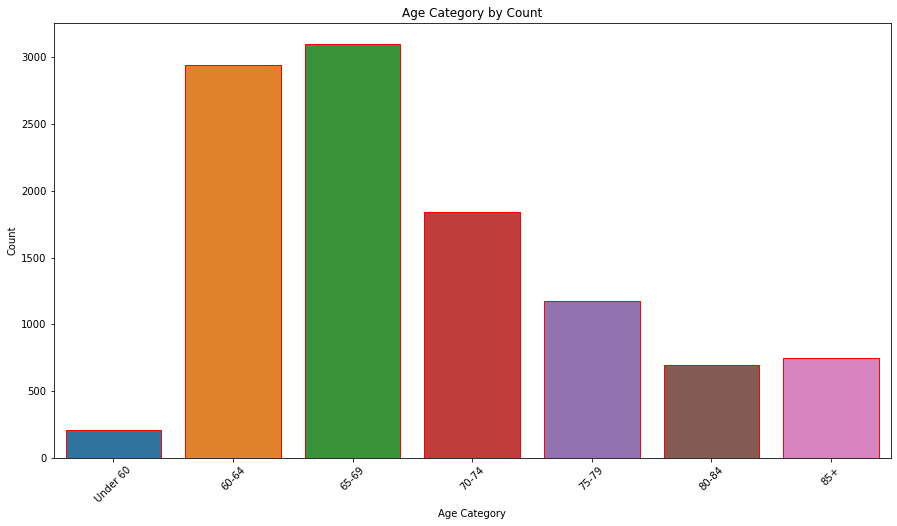

In [64]:
ax = sns.barplot(x="Age_Range", y="Age_Count", data=age_count,
                 order=["Under 60", "60-64", "65-69", "70-74", "75-79", "80-84", "85+"],edgecolor = 'red')
ax.set_ylabel("Count")
ax.set_xlabel("Age Category")
plt.xticks(rotation=45)
plt.title("Age Category by Count")
plt.gcf().set_size_inches(15, 8)

In [65]:
gender_plot = demographic[['CallerNum', 'demographics - Gender']].drop_duplicates()
gender_plot

,CallerNum,demographics - Gender
0,3638169,Female
1,4431194,Female
2,2941341,Male
3,3823933,Male
4,3348256,Female
...,...,...
57828,2385088,Female
57831,2385054,Female
57834,2385074,Female
57843,2384932,Female


In [66]:
gender_plot= pd.DataFrame(gender_plot['demographics - Gender'].value_counts()).reset_index().rename(columns={'index':'Gender', 'demographics - Gender':'Gender_Count'})


In [67]:
gender_plot

,Gender,Gender_Count
0,Female,6783
1,Male,3823
2,Transgender,1
3,Other,1


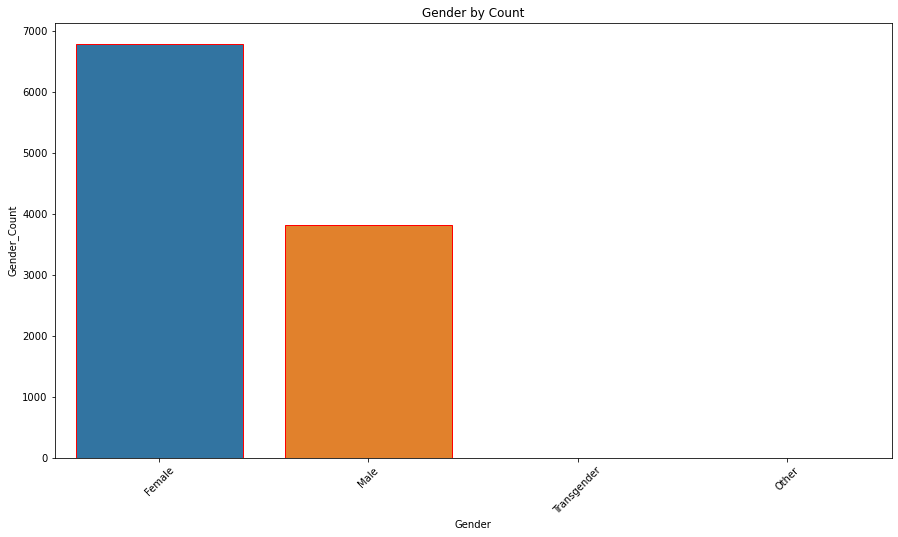

In [68]:
ax = sns.barplot(x="Gender", y="Gender_Count", data=gender_plot, edgecolor = 'red')
ax.set_ylabel("Gender_Count")
ax.set_xlabel("Gender")
plt.xticks(rotation=45)
plt.title("Gender by Count")
plt.gcf().set_size_inches(15, 8)

(-1.1142515142407745,
 1.1188723193496017,
 -1.1141053193944561,
 1.1189153306635111)

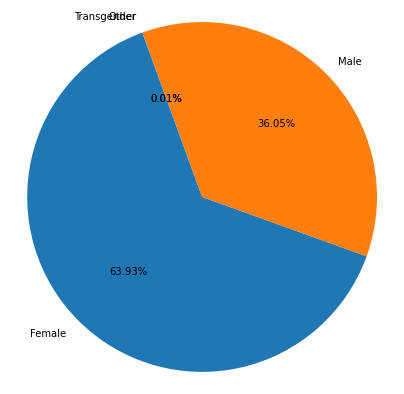

In [69]:
slices = [6794,3831,1,1]
langs = ['Female','Male','Other','Transgender']
labels= langs
sizes= slices
#explode =(0,0,0,0.2,0)
fig,ax=plt.subplots(figsize= (7,7))
ax.pie(sizes,labels=labels, autopct='%1.2f%%',shadow= False, startangle= 110)
ax.axis('equal')

In [70]:
race_plot = demographic[['CallerNum', 'demographics - Race/Ethnicity']].drop_duplicates()
race_plot.head()

,CallerNum,demographics - Race/Ethnicity
0,3638169,African American
1,4431194,Caucasian
2,2941341,Asian
3,3823933,African American
4,3348256,African American


In [71]:
race_plot= pd.DataFrame(race_plot['demographics - Race/Ethnicity'].value_counts()).reset_index().rename(columns= {'index':'Race/Ethnicity','demographics - Race/Ethnicity': 'Race/Ethnicity_Count'})
race_plot

,Race/Ethnicity,Race/Ethnicity_Count
0,Caucasian,5956
1,African American,2670
2,Hispanic,460
3,Asian,152
4,Unknown,115
5,American Indian and Alaska Native,52
6,Multi-racial,33
7,Pacific Islander,10


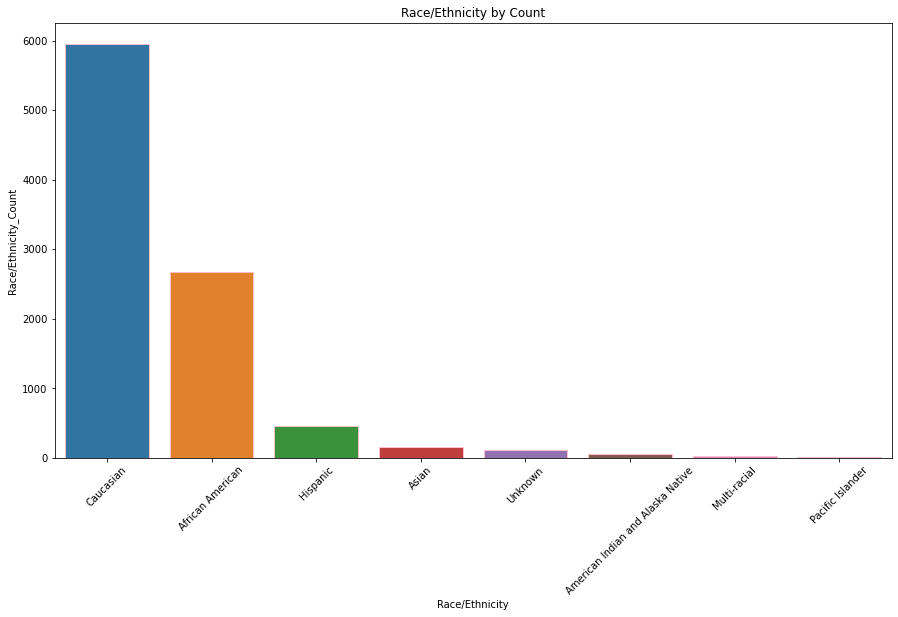

In [72]:
ax = sns.barplot(x="Race/Ethnicity", y="Race/Ethnicity_Count", data=race_plot, edgecolor = 'pink')
ax.set_ylabel("Race/Ethnicity_Count")
ax.set_xlabel("Race/Ethnicity")
plt.xticks(rotation=45)
plt.title("Race/Ethnicity by Count")
plt.gcf().set_size_inches(15, 8)

In [73]:
language_plot = demographic[['CallerNum', 'demographics - Preferred Language/Language Needed']].drop_duplicates()
language_plot.head()

,CallerNum,demographics - Preferred Language/Language Needed
0,3638169,English
1,4431194,English
2,2941341,NaN
3,3823933,NaN
4,3348256,NaN


In [74]:
language_plot= pd.DataFrame(language_plot['demographics - Preferred Language/Language Needed'].value_counts()).reset_index()
language_plot

,index,demographics - Preferred Language/Language Needed
0,English,8411
1,Spanish,377
2,Other,120
3,Arabic,64


(-1.1081672483550289,
 1.1058497064342407,
 -1.107487160667889,
 1.1013709852727516)

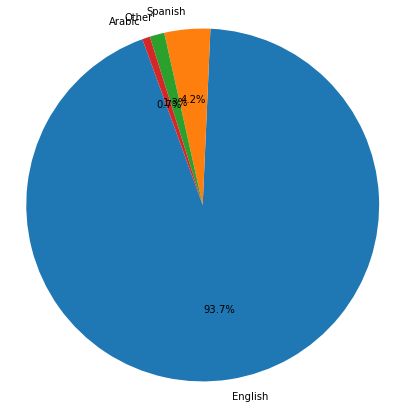

In [75]:
slices = [8411,377,120,64]
langs = ['English','Spanish','Other','Arabic']
labels= langs
sizes= slices
#explode =(0,0,0,0.2,0)
fig,ax=plt.subplots(figsize= (7,7))
ax.pie(sizes,labels=labels, autopct='%1.1f%%',shadow= False, startangle= 110)
ax.axis('equal')

In [76]:
outcomes

,CallReportNum,CallerNum,CallDateAndTimeStart,Treatment Plan - Action: Upload After Picture on Finish Tab,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",code - Action: Upload After Picture on Finish Tab,code - Is the treatment plan completed?,code - Was a treatment plan developed?,"code - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",code - What care was provided to the enrollee? (Select all that apply)
0,93115324,3638169,2021-09-30 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,4431194,2021-09-30 16:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93115081,2941341,2021-09-30 16:50:00,NaN,No,Yes,No,NaN,NaN,NaN,NaN,274 - Bitewings - four films - 5; 1110 - Proph...
3,93115032,3823933,2021-09-30 16:48:00,NaN,No,Yes,No,NaN,NaN,NaN,NaN,2391 - Posterior one surface resin - 15; 2392...
4,93114968,3348256,2021-09-30 16:46:00,NaN,No,Yes,No,NaN,NaN,NaN,NaN,No Code - Denture step Mandibular: may be used...
...,...,...,...,...,...,...,...,...,...,...,...,...
57855,55627514,2385621,2018-08-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5222 - Partial denture - resin base - immediat...
57856,67251452,2631417,2018-05-31 08:27:00,Not available,No,No,Yes,NaN,NaN,NaN,NaN,NaN
57857,53192452,-1,2018-05-23 14:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,67915561,3239813,2018-05-15 09:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create a outcomes year column by using the year from the CallDateYear column

In [77]:
outcomes.CallDateAndTimeStart

0       2021-09-30 16:56:00
1       2021-09-30 16:53:00
2       2021-09-30 16:50:00
3       2021-09-30 16:48:00
4       2021-09-30 16:46:00
                ...        
57855   2018-08-01 08:00:00
57856   2018-05-31 08:27:00
57857   2018-05-23 14:11:00
57858   2018-05-15 09:06:00
57859   2018-05-10 08:25:00
Name: CallDateAndTimeStart, Length: 57859, dtype: datetime64[ns]

In [78]:
outcomes['CallDateYear'] =pd.DatetimeIndex(outcomes['CallDateAndTimeStart']).year

In [79]:
outcomes.head (2)

,CallReportNum,CallerNum,CallDateAndTimeStart,Treatment Plan - Action: Upload After Picture on Finish Tab,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",code - Action: Upload After Picture on Finish Tab,code - Is the treatment plan completed?,code - Was a treatment plan developed?,"code - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",code - What care was provided to the enrollee? (Select all that apply),CallDateYear
0,93115324,3638169,2021-09-30 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
1,93115188,4431194,2021-09-30 16:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


## Create a questions year column by using the year from the CallDateYear column

In [80]:
questions.head (2)

,CallReportNum,CallerNum,CallDateAndTimeStart,questions - Are you limited in what you can eat?,questions - Dental Clinic,questions - Did the client commit to referral?,questions - Did you help in these other areas?,questions - Do you need help in these other areas?,questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,questions - How would you describe the condition of your mouth and teeth?,questions - What is the next step for client encounter?,questions - What is the next step for clients encounter?,Case Management Information - Dental Clinic,Case Management Information - Transportation Barriers,Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply),Case Management Information - What is the outcome for the client?
0,93115324,3638169,2021-09-30 16:56:00,Yes,Interfaith Dental Clinic - Murfreesboro,Yes,NaN,No,Yes,Poor,NaN,Referred to dental clinic,NaN,NaN,No insurance,NaN
1,93115188,4431194,2021-09-30 16:53:00,Yes,Interfaith Dental Clinic - Nashville,Yes,NaN,No,Yes,Poor,NaN,Referred to dental clinic,NaN,NaN,Dental cost; No insurance,NaN


In [81]:
questions.CallDateAndTimeStart 

0       2021-09-30 16:56:00
1       2021-09-30 16:53:00
2       2021-09-30 16:50:00
3       2021-09-30 16:48:00
4       2021-09-30 16:46:00
                ...        
57855   2018-08-01 08:00:00
57856   2018-05-31 08:27:00
57857   2018-05-23 14:11:00
57858   2018-05-15 09:06:00
57859   2018-05-10 08:25:00
Name: CallDateAndTimeStart, Length: 57859, dtype: datetime64[ns]

In [82]:
questions['Year'] = pd.DatetimeIndex(questions['CallDateAndTimeStart']).year  


In [83]:
questions

,CallReportNum,CallerNum,CallDateAndTimeStart,questions - Are you limited in what you can eat?,questions - Dental Clinic,questions - Did the client commit to referral?,questions - Did you help in these other areas?,questions - Do you need help in these other areas?,questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,questions - How would you describe the condition of your mouth and teeth?,questions - What is the next step for client encounter?,questions - What is the next step for clients encounter?,Case Management Information - Dental Clinic,Case Management Information - Transportation Barriers,Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply),Case Management Information - What is the outcome for the client?,Year
0,93115324,3638169,2021-09-30 16:56:00,Yes,Interfaith Dental Clinic - Murfreesboro,Yes,NaN,No,Yes,Poor,NaN,Referred to dental clinic,NaN,NaN,No insurance,NaN,2021
1,93115188,4431194,2021-09-30 16:53:00,Yes,Interfaith Dental Clinic - Nashville,Yes,NaN,No,Yes,Poor,NaN,Referred to dental clinic,NaN,NaN,Dental cost; No insurance,NaN,2021
2,93115081,2941341,2021-09-30 16:50:00,No,Christ Community Health Services- Broad Avenue,Yes,NaN,NaN,No,Good,Referred to dental clinic,NaN,NaN,NaN,Dental cost; No insurance,NaN,2021
3,93115032,3823933,2021-09-30 16:48:00,Yes,NaN,Yes,NaN,NaN,Yes,Fair,NaN,NaN,NaN,NaN,Dental cost; No insurance; Fear,NaN,2021
4,93114968,3348256,2021-09-30 16:46:00,Yes,NaN,Yes,NaN,NaN,Yes,Poor,NaN,NaN,NaN,Availability - no car/access to transportation,Transportation; Dental cost; No insurance,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,55627514,2385621,2018-08-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dental cost; No insurance,NaN,2018
57856,67251452,2631417,2018-05-31 08:27:00,Yes,NaN,Yes,NaN,NaN,Yes,Poor,NaN,NaN,NaN,NaN,No insurance,NaN,2018
57857,53192452,-1,2018-05-23 14:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
57858,67915561,3239813,2018-05-15 09:06:00,Yes,Church Health Center - Memphis,Yes,NaN,No,Yes,Fair,NaN,Referred to dental clinic,NaN,NaN,Dental cost; No insurance,NaN,2018


## Create a screening_info year column by using the year from the CallDateYear column

In [84]:
screening_info.head(5)

,CallReportNum,CallerNum,CallDateAndTimeStart,Screening - # of Lower Natural Teeth,Screening - # of Upper Natural Teeth,Screening - Do you have removable dentures?,Screening - Do you usually wear your denture(s) when you eat?,Screening - Experienced any problems related to mouth/teeth during past 12 months?,Screening - How often do you brush your teeth?,Screening - Need for Periodontal Care,Screening - Root Fragments,Screening - Suspicious Soft Tissue Lesions,Screening - Treatment Urgency,Screening - Untreated Decay,Site Information - Enroller ID,Site Information - Enroller Location,Clinic Information - Action: Upload Before Picture on Finish Tab,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,Clinic Information - Was initial transportation assistance or referral provided?,Screening - Last Screening Date
0,93115324,3638169,2021-09-30 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,4431194,2021-09-30 16:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN
2,93115081,2941341,2021-09-30 16:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,NaN,NaN,NaN,10/8/2019
3,93115032,3823933,2021-09-30 16:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,NaN,NaN,NaN,11/10/2020
4,93114968,3348256,2021-09-30 16:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,NaN,NaN,NaN,9/10/2021


In [85]:
screening_info["Year"]= pd.DatetimeIndex(screening_info['CallDateAndTimeStart']).year

In [86]:
screening_info.head(5)

,CallReportNum,CallerNum,CallDateAndTimeStart,Screening - # of Lower Natural Teeth,Screening - # of Upper Natural Teeth,Screening - Do you have removable dentures?,Screening - Do you usually wear your denture(s) when you eat?,Screening - Experienced any problems related to mouth/teeth during past 12 months?,Screening - How often do you brush your teeth?,Screening - Need for Periodontal Care,Screening - Root Fragments,Screening - Suspicious Soft Tissue Lesions,Screening - Treatment Urgency,Screening - Untreated Decay,Site Information - Enroller ID,Site Information - Enroller Location,Clinic Information - Action: Upload Before Picture on Finish Tab,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,Clinic Information - Was initial transportation assistance or referral provided?,Screening - Last Screening Date,Year
0,93115324,3638169,2021-09-30 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
1,93115188,4431194,2021-09-30 16:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN,2021
2,93115081,2941341,2021-09-30 16:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,NaN,NaN,NaN,10/8/2019,2021
3,93115032,3823933,2021-09-30 16:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,NaN,NaN,NaN,11/10/2020,2021
4,93114968,3348256,2021-09-30 16:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,NaN,NaN,NaN,9/10/2021,2021
